# Homework 2

In [ ]:
##### IMPORTS
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
x_file = files.upload()
y_file = files.upload()

Saving x.dat to x.dat


Saving y.dat to y.dat


In [ ]:
X_table = pd.read_table("x.dat", sep="\s+", names=["x_1", "x_2"])
X_train = np.array(X_table)
# print(X_train)
Y_table = pd.read_table("y.dat", sep="\s+", names=["y"])
Y_train = np.array(Y_table)
# print(Y_train)

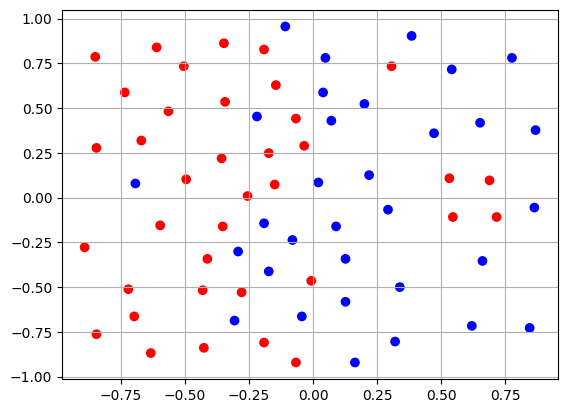

In [ ]:
xrange = X_train[:, 0]
yrange = X_train[:, 1]
y_color = ['red' if i == 0 else 'blue' for i in Y_train]
plt.scatter(xrange, yrange, c=y_color)
plt.grid(axis='both')

In [ ]:
def PlotTest(xrange,yrange,predict):
  y_color = ['g' if i == 0 else 'y' for i in predict]
  plt.scatter(xrange,yrange, c=y_color)
  plt.grid(True)

In [45]:
import pdb

def RegressionAtHome(X_train, Y_train, x_q, tau):
    lamb = 0.5
    predicted = []
    # for i in range(len(X_train)):
    #     theta = newtons_method(X_train, X_train[i], Y_train[i], x_q, tau, lamb)
    #     if h(theta, X_train[i]) > 0.5:
    #         predicted.append(1)
    #     else:
    #         predicted.append(0)
    # theta = newtons_method(X_train, X_train[5], Y_train[5], x_q, tau, lamb)
    theta = newtons_method_FULL(X_train, Y_train, x_q, tau, lamb)

    # return predicted
    return theta



# Gradient is first partial derivatives of the cost function
# Hessian Matrix is second partial derivatives of the cost function
# Newton's method uses gradient and hessian for,,,, something


## NEWTON'S METHOD
# start with random theta
# calculate gradient, diagonal, hessian for each iteration
# theta + 1 = theta - inverse hessian * gradient
# with final theta, run hypothesis again and get 0 or 1
def newtons_method(X_train, x_i, y_i, x_q, tau, lamb):
    theta = np.array([random.uniform(0,10), random.uniform(0,10)])
    # print("initial theta:", theta)
    weights = [calc_weight(x_q, xi, tau) for xi in X_train]
    w_i = calc_weight(x_q, x_i, tau)
    # iterate
    for i in range(50):
        # weight_theta = calc_weight(x_q, theta, tau)
        diagonal_matrix = diagonal(weights, X_train, theta)
        hessian = hessian_matrix(X_train, diagonal_matrix, lamb)
        inverse_hessian = np.linalg.inv(hessian)
        gradient = gradient_J(X_train, w_i, y_i, x_i, lamb, theta)
        # print(inverse_hessian.shape)
        # print(gradient.shape)
        # pdb.set_trace()
        theta = theta - np.matmul(inverse_hessian, gradient)
        # print(theta)
    return theta

def newtons_method_FULL(X_train, y_train, x_q, tau, lamb):
    theta = np.array([random.uniform(0,10), random.uniform(0,10)])
    # print("initial theta:", theta)
    weights = [calc_weight(x_q, xi, tau) for xi in X_train]
    # iterate
    for i in range(50):
        # weight_theta = calc_weight(x_q, theta, tau)
        diagonal_matrix = diagonal(weights, X_train, theta)
        hessian = hessian_matrix(X_train, diagonal_matrix, lamb)
        inverse_hessian = np.linalg.inv(hessian)
        gradient = gradient_J_weights(X_train, y_train, weights, lamb, theta)
        # print(inverse_hessian.shape)
        # print(gradient.shape)
        # pdb.set_trace()
        theta = theta - np.matmul(inverse_hessian, gradient)
        # print(theta)
    return theta

# J function -- this is what we're trying to optimize
# do we actually need this?
def J(lamb, theta, w_i, y_i, x_i, m):  # can't call it lambda bc python
    sum = 0
    for j in range(m):
        sum += w_i * (y_i * math.log(h(theta, x_i)) + (1 - y_i) * math.log(1 - h(theta, x_i)))
    return ((-1 * lamb * magnitude(theta)**2) / 2) + sum


# calculate the sigmoid function for x_i
def h(theta, x_i):
    # sigmoid function
    x_i = np.array(x_i)
    t = np.matmul(x_i.T, theta)  # if we're using the transpose of x_i, is this basically just a dot product? does this give a scalar?
    # print(t)
    # print(theta)
    val = 1 / (1 + math.exp(-1 * t))  # overflowing if t negative and kinda big
    return val
    # return 1 or 0 based on calculated value?
    # if val > 0.5:
    #     return 1
    # else:
    #     return 0

# calculate gradient of J (w.r.t theta)
def gradient_J(X, w_i, y_i, x_i, lamb, theta):
    # print("calling h from gradient")
    gradient = x_i.T * (w_i * (y_i - h(theta, x_i))) - lamb * theta
    return gradient

def gradient_J_weights(X, y_train, weights, lamb, theta):
    probabilities = np.zeros(len(X))
    # print(len(X))
    for i in range(len(X)):
        probabilities[i] = weights[i] * (y_train[i] - h(theta, X[i]))
    # print(probabilities.shape)
    # print(X.T.shape)
    gradient = np.matmul(X.T, probabilities) - lamb * theta
    return gradient


# Hessian Matrix???
def hessian_matrix(X, D, lamb):
    multiplied_matrix = np.matmul(np.matmul(X.T, D), X)
    hessian = multiplied_matrix - lamb * np.eye(multiplied_matrix.shape[0])
    return hessian

# Diagonal Matrix
def diagonal(weights, X, theta):
    diagonal_matrix = np.eye(len(X))
    for i in range(diagonal_matrix.shape[0]):
        # print("calling h from diagonal")
        sigmoid_val = h(theta, X[i])
        diagonal_matrix[i][i] = -1 * weights[i] * sigmoid_val * (1 - sigmoid_val)
    return diagonal_matrix


# calculate the magnitude of a vector
def magnitude(vector):
    mag = np.linalg.norm(vector)
    return mag

# calculate the weight based on point x_q
def calc_weight(x_q, x_i, tau):
    x_q = np.array(x_q)
    x_i = np.array(x_i)
    difference = x_q - x_i
    w_i = math.exp(-1 * (magnitude(difference)**2) / (2 * tau**2))
    return w_i


##### MAIN FUNCTION
def main():
    x_q = [1,1]
    tau = 0.5
    lamb = 0.5
    # predicted = RegressionAtHome(X_train, Y_train, x_q, tau)
    # PlotTest(xrange,yrange,predicted)
    # print(predicted)

##### PRINTS DOWN HERE
main()


0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.0
0 5 1.0
0 6 1.0
0 7 1.0
0 8 1.0
0 9 1.0
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 1.0
1 6 1.0
1 7 1.0
1 8 1.0
1 9 1.0
2 0 0.0
2 1 0.0
2 2 0.0
2 3 0.0
2 4 0.0
2 5 1.0
2 6 1.0
2 7 1.0
2 8 1.0
2 9 1.0
3 0 0.0
3 1 0.0
3 2 0.0
3 3 0.0
3 4 0.0
3 5 1.0
3 6 1.0
3 7 1.0
3 8 1.0
3 9 1.0
4 0 0.0
4 1 0.0
4 2 0.0
4 3 0.0
4 4 0.0
4 5 1.0
4 6 1.0
4 7 1.0
4 8 1.0
4 9 1.0
5 0 0.0
5 1 0.0
5 2 0.0
5 3 0.0
5 4 0.0
5 5 1.0
5 6 1.0
5 7 1.0
5 8 1.0
5 9 1.0
6 0 0.0
6 1 0.0
6 2 0.0
6 3 0.0
6 4 0.0
6 5 1.0
6 6 1.0
6 7 1.0
6 8 1.0
6 9 1.0
7 0 0.0
7 1 0.0
7 2 0.0
7 3 0.0
7 4 0.0
7 5 1.0
7 6 1.0
7 7 1.0
7 8 1.0
7 9 1.0
8 0 0.0
8 1 0.0
8 2 0.0
8 3 0.0
8 4 0.0
8 5 1.0
8 6 1.0
8 7 1.0
8 8 1.0
8 9 1.0
9 0 0.0
9 1 0.0
9 2 0.0
9 3 0.0
9 4 0.0
9 5 1.0
9 6 1.0
9 7 1.0
9 8 1.0
9 9 1.0


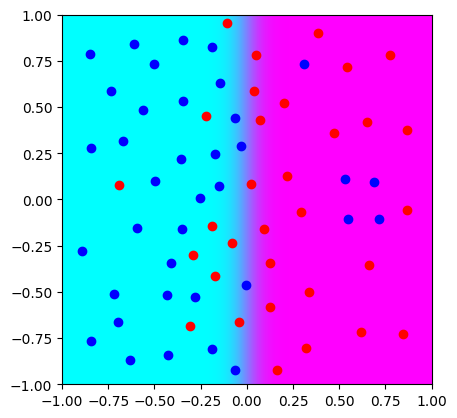

In [56]:
### HEATMAP
def heatmap_plot(x_train, y_train, tau, res):
    # Setup plotting grid
    xx, yy = np.meshgrid(np.linspace(-1, 1, res), np.linspace(-1, 1, res))
    # Make predictions
    x = np.zeros(2)
    pred = np.zeros((res, res))
    # predicted_values = []
    for i in range(res):
        for j in range(res):
            # print(i, j)
            x[0] = xx[i, j]
            x[1] = yy[i, j]
            # Perform regression with x_q= ([x[0],x[1]])
            x_q = [x[0],x[1]]
            theta = RegressionAtHome(X_train, Y_train, x_q, tau)
            if h(theta, x_q) > 0.5:
                pred[i][j] = 1
            else:
                pred[i][j] = 0
            print(i, j, pred[i][j])
            # pred = RegressionAtHome(x_train, y_train, x_q, tau)
            #Once you have theta from regression, evaluate h_theta(x_q) (Depends on your code, this step may not be necessary)
    # Scatter plot data points
    for i in range(0,y_train.size):
        if y_train[i]==0:
            plt.scatter(x_train[i,0],x_train[i,1],c='b')
        if y_train[i]==1:
            plt.scatter(x_train[i,0],x_train[i,1],c='r')
    # Plot heat map (np.expand_dims accounts for the dimension error of pred when imshow is called, moves from 1D to 2D - Eliza)
    # pred = np.expand_dims(pred, axis=0)
    plt.imshow(pred, cmap='cool',interpolation='gaussian',extent=[-1,1,-1,1])
      # interpolation is just different kinds of blurry on the map
    plt.show()

# res = 10, 3min45sec
resolution = 10
tau = 0.5
heatmap_plot(X_train, Y_train, tau, resolution)

## Problem 2

1. Soft-Margin Linear SVM, C=.02 corresponds to graph #4. This is a linear model with larger margins, so the C value is lower.
2. Soft-Margin Linear SVM, C=20 corresponds to graph #3. This is a linear model with smaller margins, so the C value is higher.
3. A hard-margin kernel SVM with $k(u,v) = uv - (uv)^2$ corresponds to graph #5. This is a polynomial kernel, which matches the shape of this decision boundary.
4. A hard-margin kernel SVM with $k(u,v) = exp(-5\|u-v\|^2)$ corresponds to graph #6. The high gamma value (5) implies that the decision boundary will be overfitted.
5. A hard margin kernel SVM with $k(u,v) = exp(-\frac{1}{5}\|u-v\|^2)$ corresponds to graph #1. The relatively low gamma value of $\frac{1}{5}$ implies that the decision boundary will not be overfitted.
